## Importando os modulos

In [1]:
from real_estate.src.database.firebase_manager import connect_to_firebase, get_firebase_data
from sklearn.cluster import KMeans
from matplotlib import pyplot
from numpy import unique
from numpy import where
from numpy import nan
import pandas as pd

### Coletado os dados

In [2]:
connect_to_firebase()

data = get_firebase_data("Perdizes, São Paulo")
df = pd.DataFrame(data)
# df.dropna(inplace=True)

###  Tratativa de dados

In [3]:
df["preço/m²"] = df.eval("preço/área")


def select_quantitative_data(df: pd.DataFrame):
    return df._get_numeric_data().copy()

quantitative_df = select_quantitative_data(df)
quantitative_df.describe()

,banheiros,distância,lat,lon,preço,quartos,área,vagas,valor_de_condominio,preço/m²
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,60.000000,60.000000,89.000000
mean,2.662921,153.445712,-22.923980,-47.458224,7159.101124,1.921348,174.494382,2.000000,1146.583333,39.320641
std,1.757735,409.501413,2.663083,2.904017,8941.764067,1.307537,192.497292,1.626059,1355.827101,19.539655
min,0.000000,0.000000,-29.853067,-58.801358,550.000000,0.000000,12.000000,0.000000,0.000000,7.857143
25%,2.000000,0.638657,-23.540207,-46.686873,2100.000000,1.000000,67.000000,1.000000,340.000000,27.777778
50%,2.000000,1.019312,-23.537929,-46.680671,3500.000000,2.000000,100.000000,1.000000,800.000000,34.868421
75%,3.000000,6.294660,-23.530882,-46.674390,8800.000000,3.000000,190.000000,3.000000,1307.500000,48.888889
max,9.000000,1689.754186,-13.543350,-43.057294,42000.000000,4.000000,960.000000,8.000000,8340.000000,120.833333


### Aplicando um modelo de classificação

In [4]:
quantitative_df = select_quantitative_data(df)
train_data = quantitative_df.fillna(0).to_numpy()


k_means_model = KMeans(n_clusters=5, random_state=42)
k_means_model.fit(train_data)

predicted_data = k_means_model.predict(train_data)

cluster_names = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E'
}

# Create column with classification data
quantitative_df["cluster"] = [cluster_names[i]for i in predicted_data]

clusters = unique(predicted_data)

### Analisando os resultados

In [5]:
def plot(x, y, predicted_data, data_to_plot, clusters, legend):
    for cluster in clusters:
        row_ix = where(predicted_data == cluster)
        pyplot.scatter(quantitative_df.loc[row_ix, x], quantitative_df.loc[row_ix, y])

    pyplot.legend(legend)
    pyplot.xlabel(x)
    pyplot.ylabel(y)
    pyplot.show()

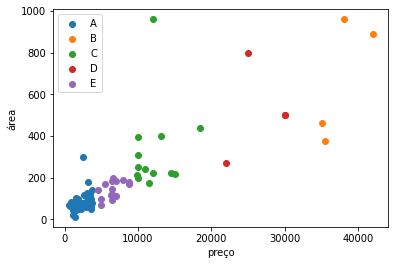

In [6]:
column_index_map = {col: idx for idx, col in enumerate(quantitative_df.columns)}

x = "preço"
y = "área"

plot(x, y, predicted_data, quantitative_df, clusters, cluster_names.values())

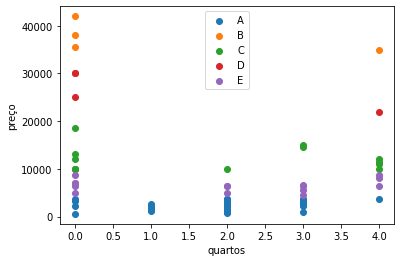

In [7]:
x = "quartos"
y = "preço"

plot(x, y, predicted_data, quantitative_df, clusters, cluster_names.values())

In [8]:
for cluster in cluster_names.values():
    print(f"\t\t\t\t\t\t{cluster}")
    display(quantitative_df[quantitative_df["cluster"] == cluster].describe())
    print("-"*100)
    print()

						A


,banheiros,distância,lat,lon,preço,quartos,área,vagas,valor_de_condominio,preço/m²
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,45.000000,45.000000,53.000000
mean,1.962264,224.811500,-22.694294,-47.761789,2329.622642,2.056604,82.226415,1.355556,678.155556,32.174037
std,0.876230,466.537204,3.162333,3.360015,939.404399,0.886113,41.739412,0.856938,492.984693,17.729851
min,0.000000,0.000000,-29.853067,-58.801358,550.000000,0.000000,12.000000,0.000000,0.000000,7.857143
25%,1.000000,0.638657,-23.540207,-46.690688,1500.000000,2.000000,62.000000,1.000000,320.000000,22.388060
50%,2.000000,0.976866,-23.537929,-46.680671,2500.000000,2.000000,73.000000,1.000000,640.000000,31.250000
75%,3.000000,283.594112,-23.530882,-46.674445,3200.000000,3.000000,98.000000,2.000000,1000.000000,35.869565
max,4.000000,1689.754186,-13.543350,-43.057294,3700.000000,4.000000,300.000000,4.000000,2150.000000,120.833333


----------------------------------------------------------------------------------------------------

						B


,banheiros,distância,lat,lon,preço,quartos,área,vagas,valor_de_condominio,preço/m²
count,4.00,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,2.000000,2.000000,4.000000
mean,7.25,423.019458,-21.038143,-49.707286,37625.000000,1.0,670.500000,6.000000,1000.000000,64.443912
std,1.50,844.490004,4.996533,6.062716,3198.306844,2.0,295.795537,1.414214,1414.213562,25.630401
min,6.00,0.000000,-23.543581,-58.801358,35000.000000,0.0,374.000000,5.000000,0.000000,39.583333
25%,6.00,0.764484,-23.539342,-49.710842,35375.000000,0.0,439.250000,5.500000,500.000000,45.408798
50%,7.00,1.161823,-23.532819,-46.677497,36750.000000,0.0,674.000000,6.000000,1000.000000,61.636264
75%,8.25,423.416798,-21.031619,-46.673941,39000.000000,1.0,905.250000,6.500000,1500.000000,80.671378
max,9.00,1689.754186,-13.543350,-46.672792,42000.000000,4.0,960.000000,7.000000,2000.000000,94.919786


----------------------------------------------------------------------------------------------------

						C


,banheiros,distância,lat,lon,preço,quartos,área,vagas,valor_de_condominio,preço/m²
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,4.000000,4.000000,13.000000
mean,3.692308,1.340871,-23.537759,-46.674296,12123.076923,1.846154,326.461538,4.000000,3326.250000,44.737735
std,2.175033,0.669541,0.009215,0.009265,2588.485351,1.863963,208.847079,1.414214,500.422738,16.612389
min,0.000000,0.000000,-23.555635,-46.687885,9900.000000,0.000000,173.000000,3.000000,2800.000000,12.500000
25%,2.000000,0.933949,-23.544199,-46.680671,10000.000000,0.000000,219.000000,3.000000,2950.000000,33.000000
50%,4.000000,1.355334,-23.535280,-46.676038,11500.000000,2.000000,240.000000,3.500000,3352.500000,45.833333
75%,5.000000,1.743861,-23.531134,-46.665397,13200.000000,4.000000,394.000000,4.500000,3728.750000,53.811659
max,7.000000,2.387542,-23.526025,-46.661935,18500.000000,4.000000,960.000000,6.000000,3800.000000,68.493151


----------------------------------------------------------------------------------------------------

						D


,banheiros,distância,lat,lon,preço,quartos,área,vagas,valor_de_condominio,preço/m²
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,2.000000,2.000000,4.000000
mean,2.250000,5.083822,-23.558925,-46.646480,26750.000000,1.0,517.500000,6.000000,6070.000000,58.182870
std,2.629956,7.994474,0.057137,0.057860,3947.573094,2.0,217.313138,2.828427,3210.264787,20.613982
min,0.000000,0.623776,-23.644312,-46.677597,22000.000000,0.0,270.000000,4.000000,3800.000000,31.250000
25%,0.000000,1.124127,-23.564083,-46.675346,24250.000000,0.0,442.500000,5.000000,4935.000000,52.812500
50%,2.000000,1.323122,-23.532682,-46.674301,27500.000000,0.0,500.000000,6.000000,6070.000000,60.000000
75%,4.250000,5.282817,-23.527525,-46.645435,30000.000000,1.0,575.000000,7.000000,7205.000000,65.370370
max,5.000000,17.065268,-23.526025,-46.559722,30000.000000,4.0,800.000000,8.000000,8340.000000,81.481481


----------------------------------------------------------------------------------------------------

						E


,banheiros,distância,lat,lon,preço,quartos,área,vagas,valor_de_condominio,preço/m²
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,7.000000,7.000000,15.000000
mean,3.133333,0.787626,-23.537165,-46.681744,6572.666667,2.000000,145.066667,2.714286,1547.571429,48.147691
std,1.187234,0.434917,0.004657,0.007376,1275.284095,1.603567,41.040862,0.951190,1014.949072,13.336137
min,1.000000,0.000000,-23.544660,-46.691075,4500.000000,0.000000,67.000000,1.000000,0.000000,32.142857
25%,2.000000,0.612644,-23.539312,-46.686679,5950.000000,0.000000,115.000000,2.500000,974.500000,36.798337
50%,3.000000,0.728437,-23.537929,-46.682054,6500.000000,2.000000,145.000000,3.000000,1431.000000,48.888889
75%,4.000000,1.023175,-23.535432,-46.676930,7000.000000,3.000000,181.000000,3.000000,2276.500000,53.560105
max,5.000000,1.693203,-23.527609,-46.664174,8800.000000,4.000000,200.000000,4.000000,2900.000000,74.626866


----------------------------------------------------------------------------------------------------



In [10]:
quantitative_df[quantitative_df["cluster"] == 'C']

,banheiros,distância,lat,lon,preço,quartos,área,vagas,valor_de_condominio,preço/m²,cluster
2,4,1.961537,-23.534020,-46.661935,10000,0,394,NaN,NaN,25.380711,C
3,2,2.387542,-23.555635,-46.667331,10000,2,250,NaN,NaN,40.000000,C
5,0,1.628233,-23.551997,-46.676038,18500,0,440,NaN,NaN,42.045455,C
7,6,0.000000,-23.537929,-46.680671,12000,0,960,NaN,NaN,12.500000,C
11,2,1.355334,-23.526025,-46.677597,10000,0,310,NaN,NaN,32.258065,C
15,1,0.932491,-23.544199,-46.686766,15000,3,219,NaN,NaN,68.493151,C
22,3,1.243697,-23.527609,-46.675870,10000,0,200,NaN,NaN,50.000000,C
25,2,1.961537,-23.534020,-46.661935,14500,3,222,NaN,NaN,65.315315,C
26,7,1.731753,-23.531134,-46.665397,13200,0,400,NaN,NaN,33.000000,C
53,5,1.743861,-23.536833,-46.663634,11000,4,240,3.0,3000.0,45.833333,C
